In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import plotly.express as px
import plotly.io as pio

In [2]:
#!pip install fmp_python
import fmp_api

In [3]:
def pull_request_index_price(index_ticker):
    index_historical_prices = requests.get(f'https://financialmodelingprep.com/api/v3/historical-price-full/%5E{index_ticker}?apikey={fmp_api.api_key}').json()
    #https://financialmodelingprep.com/api/v3/historical-price-full/%5EGSPC?apikey=c0cfe463556434293eb79f518436caca
    return index_historical_prices

## TICKER FOR EACH INDEX
### DOW_JONES (DJI)
### S&P 500 (GSPC)
### NASDAQ (IXIC)
### Russell 2000 Index (RUT)

In [4]:
big_indexes = ['DJI', 'GSPC', 'IXIC', 'RUT']

In [5]:
pull_request_index_price('RUT')

{'symbol': '^RUT',
 'historical': [{'date': '2023-07-07',
   'open': 1843.16,
   'high': 1878.9,
   'low': 1843.16,
   'close': 1864.66,
   'adjClose': 1864.664307,
   'volume': 0,
   'unadjustedVolume': 0,
   'change': 21.5,
   'changePercent': 1.17,
   'vwap': 1862.24,
   'label': 'July 07, 23',
   'changeOverTime': 0.0117},
  {'date': '2023-07-06',
   'open': 1867.13,
   'high': 1867.13,
   'low': 1823.91,
   'close': 1842.23,
   'adjClose': 1842.22998,
   'volume': 3682020000,
   'unadjustedVolume': 3682020000,
   'change': -24.9,
   'changePercent': -1.33,
   'vwap': 1850.1,
   'label': 'July 06, 23',
   'changeOverTime': -0.0133},
  {'date': '2023-07-05',
   'open': 1891.96,
   'high': 1891.96,
   'low': 1872.91,
   'close': 1872.91,
   'adjClose': 1872.910034,
   'volume': 0,
   'unadjustedVolume': 0,
   'change': -19.05,
   'changePercent': -1.01,
   'vwap': 1882.44,
   'label': 'July 05, 23',
   'changeOverTime': -0.0101},
  {'date': '2023-07-03',
   'open': 1887.03,
   'high'

In [6]:
def create_report_pull(index_list):
    index_prices = []
    for t in range(len(index_list)):
        try:
            index_prices.append(pull_request_index_price(index_list[t]))
        except NameError:
            print("Something else went wrong")
        df_index_data = pd.json_normalize(index_prices, 'historical', ['symbol'])
        # shift column 'symbol' to first position
        first_column = df_index_data.pop('symbol')
        
        # insert column using insert(position,column_name,first_column) function
        df_index_data.insert(0, 'symbol', first_column)
    return df_index_data

In [7]:
create_report_pull(big_indexes) # To Do: rewrite function

,symbol,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,^DJI,2023-07-07,33837.070000,34036.380000,33716.750000,33734.880000,33734.878906,272739963,272739963,-102.19000,-0.30201,33829.34,"July 07, 23",-0.003020
1,^DJI,2023-07-06,34171.390000,34171.390000,33771.470000,33922.260000,33922.261719,293840000,293840000,-249.13000,-0.72906,34009.13,"July 06, 23",-0.007291
2,^DJI,2023-07-05,34344.720000,34376.110000,34226.980000,34288.640000,34288.640625,274570000,274570000,-56.08000,-0.16329,34309.11,"July 05, 23",-0.001633
3,^DJI,2023-07-03,34369.780000,34465.600000,34286.540000,34418.470000,34418.468750,157590000,157590000,48.69000,0.14167,34385.10,"July 03, 23",0.001417
4,^DJI,2023-06-30,34269.920000,34467.350000,34269.920000,34407.600000,34407.601563,351060000,351060000,137.68000,0.40175,34353.70,"June 30, 23",0.004018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,^RUT,2018-07-13,1690.290039,1697.400024,1686.880005,1687.079956,1687.079956,2619790000,2619790000,-3.21008,-0.18991,1690.45,"July 13, 18",-0.001899
5028,^RUT,2018-07-12,1685.170044,1692.430054,1679.260010,1690.280029,1690.280029,2834230000,2834230000,5.10999,0.30323,1687.32,"July 12, 18",0.003032
5029,^RUT,2018-07-11,1694.060059,1696.020020,1683.099976,1683.660034,1683.660034,2986180000,2986180000,-10.40002,-0.61391,1687.59,"July 11, 18",-0.006139
5030,^RUT,2018-07-10,1704.829956,1708.560059,1689.349976,1695.619995,1695.619995,3080140000,3080140000,-9.20996,-0.54023,1697.84,"July 10, 18",-0.005402


In [8]:
df = create_report_pull(big_indexes)

In [9]:
df['full_date'] = pd.to_datetime(df['date'], errors='coerce')

df['calendar_year'] = df['full_date'].dt.year

In [10]:
index_price_data_2020 = df[df['calendar_year'] == 2020]

In [11]:
index_price_data_2020.to_csv('data/index_price_data_2020.csv', mode='w', index=False) #index is False as we don't want to write index in csv file

In [12]:
fig = px.line(df, x="date", y="close", color="symbol", title="CLOSING PRICES OVER TIME")

In [13]:
fig.update_xaxes(range=["2019-01-01", "2023-01-01"])

In [14]:
pio.write_html(fig, "data/indices_prices.html")

In [15]:
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

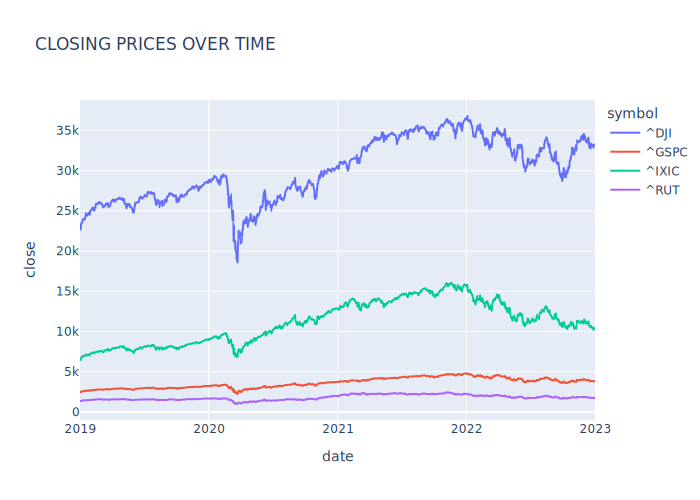

In [16]:
fig.show(renderer="svg")